### DATASET can be downloaded here -> https://www.kaggle.com/vetrirah/avcrosssellhackathon

"10" Things that Worked in this AV Cross Sell Hackathon :
===========================================

1. **2 BEST Features** - Target Encoding of Vehicle_Damage and Sum of Vehicle_Damage Grouped by Region_Code - Based on Feature Importance - Gave a Good Boost in CV(10-Fold Cross Validation) and LB(Public LeaderBoard)
1. **Domain Based Feature** : Frequency Encoding of Old Vehicle - Gave a little Boost. LB Score - 0.85838 | LB Rank - 15
1. **Rank Features from Hackathon Solutions** - Gave a Huge Boost. LB Score - 0.858510 | LB Rank - 23
1. **Dropping "id"** Column - Gave a Good Boost.
1. **Domain Based Feature** : Vehicle_Damage per Vehicle_Age & Region_Code - Gave a little Boost. LB Score - 0.858527 | LB Rank - 22
1. **Removing Skew in Annual_Premium** - Gave a Huge Boost. Score - 0.85857 LB Score - 0.85855 | LB Rank - 20
1. **Domain Based Feature** : Vehicle_Damage per Region_Code and Policy_Sales_Channel - Based on Feature Importance - Gave a little Boost. LB Score - 0.85856 | LB Rank - 20 
1. **Tuned all 3 Models with Hyper parameters and 10-Fold CV** over a 5-Fold CV gave a Robust Strategy and Best results with early_stopping_rounds=50 or 100. Scale_pos_weight didnt work much here. 
1. **Domain Based Feature :** Customer Term in Years because other features are also in Years and Insurance Response will be based on Number of Years. LB Score - 0.858657 | LB Rank - 18
1. **Ensemble / Blending of all 3 Best Individual Models - LightGBM, CatBoost and XGBoost gave the Best Private Score.**

"5" Things that didn't Work :
===========================================

1. FEATURES that DIDN'T WORK OUT :

#### [Sum of Vehicle_Damage grouped by Age , Sum of Vehicle_Damage grouped by Previously_Insured, Count of Vehicle_Damage grouped by Region_Code , Max of Vehicle_Damage grouped by Region_Code, Min of Vehicle_Damage grouped by Region_Code, Frequency Encoding of Old Age and Old Vehicle, Frequency Encoding of Vehicle_Age, EMI per Month = Annual_Premium / 12 , Sum of Vehicle_Damage grouped by  Policy_Sales_Channel, Sum of Vehicle_Damage grouped by Vehicle_Age,Sum of Vehicle_Damage grouped by Driving_License]

2. **Dropping Driving_License Column** which was not much correlating with Response.
3. **One Hot Encoding / Dummy Encoding** of All Features.
4. **All 3 Types of Scaling didn't work** compared to Unscaled Data - StandardScaler gave BEST LB Score among them. StandardScaler - 0.8581 | MinMaxScaler - 0.8580 | RobustScaler - 0.8444
5. **Removing Duplicates on Region_Code** between Train and Testbased didn't Work at all.

## Steps for Applied Machine Learning (ML) for Hackathons :

1.  Understand the Problem Statement & Import Packages and Datasets.  

2.  Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

       *       Explore Train and Test Data and get to know what each Column / Feature denotes.
       *       Check for Imbalance of Target Column in Datasets.
       *       Visualize Count Plots & Unique Values to infer from Datasets.
            
3.  Remove Duplicate Rows from Train Data if present.

4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.

5.  Feature Engineering 

      *       Feature Selection - Selection of Most Important Existing Features.
      *       Feature Creation  - Creation  of New Feature from the Existing Features.
      
6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent).      
7.  Data Encoding - Label Encoding, OneHot Encoding and Data Scaling - MinMaxScaler, StandardScaler, RobustScaler
8.  Create Baseline ML Model for Binary Classification Problem
9.  Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "ROC_AUC" with k-FOLD Cross Validation and Predict Target "Response"
10. Result Submission, Check Leaderboard & Improve "ROC_AUC" Score

## 1.  Understand the Problem Statement & Import Packages and Datasets :

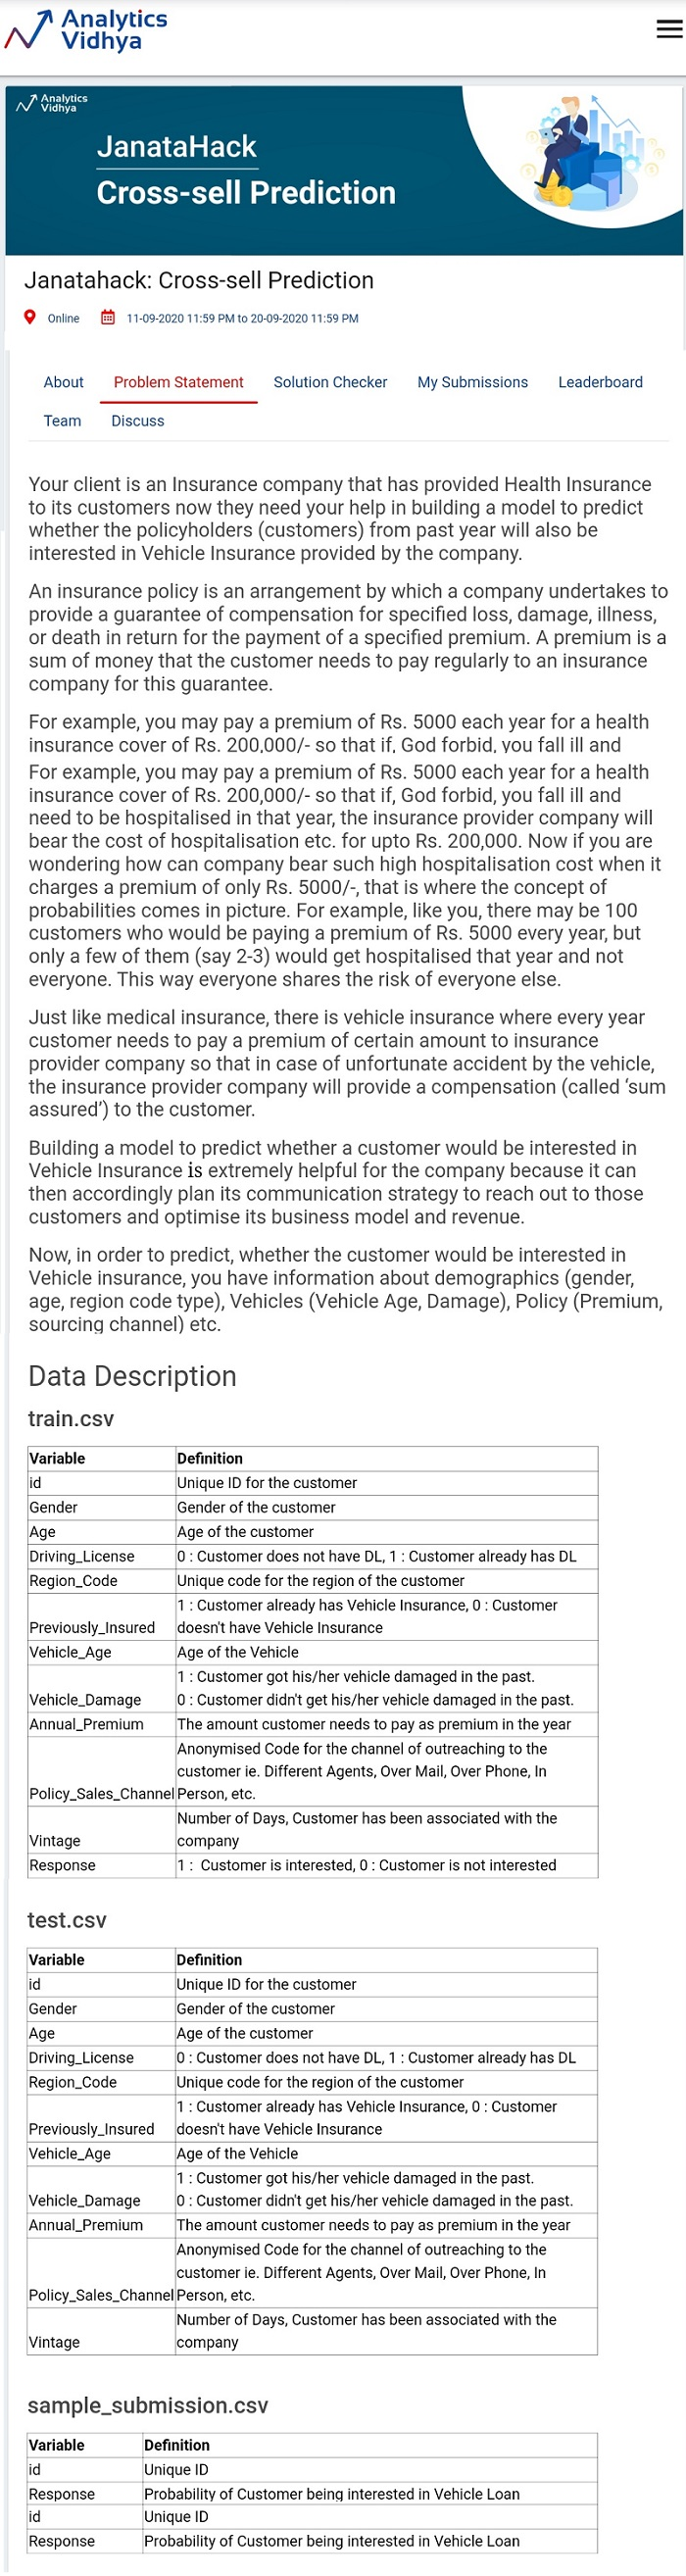

### **To use LightGBM GPU Model : "Turn On Internet Button"** on the right side in Settings - Run all 5 Cells !!!

In [ ]:
# Keep Internet "On" which is present in right side -> Settings Panel
!rm -r /opt/conda/lib/python3.6/site-packages/lightgbm
!git clone --recursive https://github.com/Microsoft/LightGBM

In [ ]:
# Keep Internet "On" which is present in right side -> Settings Panel
!apt-get install -y -qq libboost-all-dev

In [ ]:
%%bash
cd LightGBM
rm -r build
mkdir build
cd build
cmake -DUSE_GPU=1 -DOpenCL_LIBRARY=/usr/local/cuda/lib64/libOpenCL.so -DOpenCL_INCLUDE_DIR=/usr/local/cuda/include/ ..
make -j$(nproc)

In [ ]:
# Keep Internet "On" which is present in right side -> Settings Panel
!cd LightGBM/python-package/;python3 setup.py install --precompile

In [ ]:
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd
!rm -r LightGBM

In [ ]:
# Import Required Python Packages :

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# Scikit-Learn Pre-Processing Libraries :

from sklearn.preprocessing import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier, Pool
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import RandomForestClassifier, VotingClassifier

# Model Evaluation Metric & Cross Validation Libraries :
from sklearn.metrics                  import roc_auc_score, auc, roc_curve
from sklearn.model_selection          import StratifiedKFold,KFold, RepeatedStratifiedKFold, train_test_split

# Setting SEED to Reproduce Same Results even with "GPU" :
seed_value = 1994
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
SEED=seed_value

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Loading data from train, test and submission csv files :

train = pd.read_csv('../input/avcrosssellhackathon/train.csv')
test = pd.read_csv('../input/avcrosssellhackathon/test.csv')
sub = pd.read_csv('../input/avcrosssellhackathon/sample_submission.csv')

## 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :    

### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [ ]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "train")

In [ ]:
# Display Data Information of "test" :

display_data_information(test, data_types, "test")

In [ ]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(train, head_rows=3, tail_rows=2)

In [ ]:
display_head_tail(test, head_rows=3, tail_rows=2)

In [ ]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "train" :

display_data_description(train, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Description of "test" :

display_data_description(test, data_types[0:4], data_types[4:7])

In [ ]:
# Checking Percentage(%) of Common ID's  between train and test data using Unique train values :

id_col_in_data = 'id'
print(np.intersect1d(train[id_col_in_data], test[id_col_in_data]).shape[0]/train[id_col_in_data].nunique())
common_ids = len(set(test[id_col_in_data].unique()).intersection(set(train[id_col_in_data].unique())))
print("Common IDs : ",common_ids)

# No Data Leak, there are 127037 ID's in Common

print("Unique IDs : ",test.shape[0] - common_ids)

## 3.  Remove Duplicate Rows from Train data if present :

In [ ]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train = remove_duplicate(train)

# No Duplicates at all !!!

## 4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

In [ ]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
#             print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0
# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
train = fill_missing_values(train, fill_value, fill_types, ["Gender"],"train")

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" :
test  = fill_missing_values(test, fill_value, fill_types, ["Gender"],"test")

# No Missing Values !!!

In [ ]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
#         print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
#         print("NULL Values :")
#         print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "train" :
# Check "train" data for Values of each Column - Long Form :

display_unique(train)

# Display this info in a Table Format - Improvements coming In Part 2

In [ ]:
# Check "train" data for Values of each Column - Short Form :
# Use Whichever you feel good working with :

for i in train:
    print(f"column {i} unique values {train[i].unique()}")

### Binary Classification Problem - Target has ONLY 2 Categories - 
### Target - Response has 2 Values of Customers [1,0]

## 5.  Feature Engineering

### 5.1 Feature Selection - Selection of Most Important Existing Features
### 5.2 Feature Creation  - Creation  of New Features from the Existing Features / Predictors :

In [ ]:
# Combine train and test data into single DataFrame - combine_set :

combine_set=pd.concat([train,test],axis=0)

In [ ]:
# converting object to int type :

combine_set['Vehicle_Age']=combine_set['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
combine_set['Gender']=combine_set['Gender'].replace({'Male':1,'Female':0})
combine_set['Vehicle_Damage']=combine_set['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [ ]:
sns.heatmap(combine_set.corr())

In [ ]:
# HOLD - CV - 0.8589 - BEST EVER :
combine_set['Vehicle_Damage_per_Vehicle_Age'] = combine_set.groupby(['Region_Code','Age'])['Vehicle_Damage'].transform('sum')

# Score - 0.858657 (This Feature + Removed Scale_Pos_weight in LGBM) | Rank - 20 
combine_set['Customer_Term_in_Years'] = combine_set['Vintage'] / 365

# combine_set['Customer_Term'] = (combine_set['Vintage'] / 365).astype('str')

# Score - 0.85855 | Rank - 20 
combine_set['Vehicle_Damage_per_Policy_Sales_Channel'] = combine_set.groupby(['Region_Code','Policy_Sales_Channel'])['Vehicle_Damage'].transform('sum')

# Score - 0.858527 | Rank - 22
combine_set['Vehicle_Damage_per_Vehicle_Age'] = combine_set.groupby(['Region_Code','Vehicle_Age'])['Vehicle_Damage'].transform('sum')

# Score - 0.858510 | Rank - 23
combine_set["RANK"] = combine_set.groupby("id")['id'].rank(method="first", ascending=True)
combine_set["RANK_avg"] = combine_set.groupby("id")['id'].rank(method="average", ascending=True)
combine_set["RANK_max"] = combine_set.groupby("id")['id'].rank(method="max", ascending=True)
combine_set["RANK_min"] = combine_set.groupby("id")['id'].rank(method="min", ascending=True)
combine_set["RANK_DIFF"] = combine_set['RANK_max'] - combine_set['RANK_min']

# Score - 0.85838 | Rank - 15
combine_set.loc[(combine_set['Vehicle_Age'] == 2) & (combine_set['Vehicle_Damage'] == 1), 'Old_Vehicle'] = 1 
combine_set.loc[(combine_set['Vehicle_Age'] != 2) & (combine_set['Vehicle_Damage'] == 0), 'Old_Vehicle'] = 0
frequency_encoding = combine_set.groupby(["Old_Vehicle"]).size()/len(combine_set)
combine_set["Old_Vehicle"]   = combine_set["Old_Vehicle"].map(frequency_encoding)

# Score - 0.85837 | Rank - 15
combine_set['Vehicle_Damage_per_Region_Code'] = combine_set.groupby(['Region_Code'])['Vehicle_Damage'].transform('sum')

In [ ]:
sns.distplot(combine_set['Annual_Premium'])

In [ ]:
# Score - 0.8584, Rank - 18
# Data is left Skewed as we can see from above distplot

combine_set['Annual_Premium']=np.log(combine_set['Annual_Premium'])
sns.distplot(combine_set['Annual_Premium'])

In [ ]:
combine_set.columns

In [ ]:
# Getting back Train and Test after Preprocessing :

train=combine_set[combine_set['Response'].isnull()==False]
test=combine_set[combine_set['Response'].isnull()==True].drop(['Response'],axis=1)

In [ ]:
train.columns

In [ ]:

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

# Score - 0.85857 | Rank - 

tr_g, te_g = target_encode(train["Vehicle_Damage"], 
                         test["Vehicle_Damage"], 
                         target=train["Response"], 
                         min_samples_leaf=200,
                         smoothing=20,
                         noise_level=0.02)
train['Vehicle_Damage_me']=tr_g
test['Vehicle_Damage_me']=te_g

# tr_g, te_g = target_encode(train["Customer_Term_in_Years"], 
#                          test["Customer_Term_in_Years"], 
#                          target=train["Response"], 
#                          min_samples_leaf=200,
#                          smoothing=20,
#                          noise_level=0.02)
# train['Customer_Term_in_Years_me']=tr_g
# test['Customer_Term_in_Years_me']=te_g

# train.drop(["Customer_Term_in_Years"],axis=1)
# test.drop(["Customer_Term_in_Years"],axis=1)

# Customer_Term_in_Months

## 6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent) :

In [ ]:
# Split the Train data into predictors and target :
predictor_train = train.drop(['Response','id'],axis=1)
target_train    = train['Response']
predictor_train.head()

In [ ]:
# Get the Test data by dropping 'id' :
predictor_test = test.drop(['id'],axis=1)

## 7.  Data Encoding - Label Encoding :

In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

# All 3 Types of Scaling didnt work - Choosing StandardScaler which gives BEST Score :
# StandardScaler - 0.8581 | MinMaxScaler - 0.8580 | RobustScaler - 0.8444

scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]

# Scaling didn't give an Improvement in Score so commneted :

# predictor_train_scale = data_scaling( scaling_strategy[1] , predictor_train , predictor_train.columns )
# predictor_test_scale = data_scaling( scaling_strategy [1] , predictor_test , predictor_test.columns )
predictor_train_scale = predictor_train
predictor_test_scale = predictor_test

In [ ]:
print("predictor_train_encode SHAPE   : ",predictor_train_scale.shape)
display("predictor_train_encode COLUMNS : ",predictor_train_scale.head())

print("predictor_test_encode SHAPE   : ",predictor_test_scale.shape)
display("predictor_test_encode COLUMNS : ",predictor_test_scale.head())

## 8.  Create Baseline ML Model :

In [ ]:
# Skipped Now !

## 9. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "ROC_AUC" with k-FOLD Cross Validation and Predict Target "Response" :

In [ ]:
predictor_train_scale.info()

In [ ]:


kf=KFold(n_splits=10,shuffle=True)

preds_1   = list()
y_pred_1  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    lg= LGBMClassifier( metric= 'auc',
                       
                       # GPU PARAMETERS #
                       device = "gpu",
                       gpu_device_id =0,
                       max_bin = 63,
                       gpu_platform_id=1,
                       # GPU PARAMETERS #
                       
                       n_estimators=50000,    
                       bagging_fraction=0.95, 
                       subsample_freq = 2, 
                       objective ="binary",
                       min_samples_leaf= 2,
                       importance_type = "gain",
                       verbosity = -1,
                       random_state=294,
                       num_leaves = 300,
                       boosting_type = 'gbdt',
                       learning_rate=0.15,
                       max_depth=4, 
                     # scale_pos_weight=2, # Score - 0.85865 | Rank - 18
                       n_jobs=-1 
                      )

    lg.fit(X_train, y_train
          ,eval_set=[(X_train, y_train),(X_val, y_val)]           
          ,early_stopping_rounds=100
          ,verbose=100
          )

    roc_auc = roc_auc_score(y_val,lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds_1.append(lg.predict_proba(predictor_test_scale[predictor_test_scale.columns])[:, 1])
    
y_pred_final_1          = np.mean(preds_1,axis=0)    
sub['Response']=y_pred_final_1

Blend_model_1 = sub.copy()

In [ ]:
print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

## 10. Result Submission , Check Leaderboard & Improve "ROC_AUC" :

In [ ]:
# Download and Show Submission File :

display("sample_submmission",sub)
sub_file_name_1 = "S1. LGBM_GPU_TargetEnc_Vehicle_Damage_me_1994SEED_LGBM_NoScaler_MyStyle.csv"
sub.to_csv(sub_file_name_1,index=False)
sub.head(5)

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold

kf=KFold(n_splits=10,shuffle=True)

preds_2   = list()
y_pred_2  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))
    
    cb = CatBoostClassifier( eval_metric='AUC',
                            
                            # GPU PARAMETERS #
                            task_type='GPU',
                             devices="0",
                            # GPU PARAMETERS #
                            
                            learning_rate=0.15, 
                            n_estimators=494, 
                            max_depth=7, 
#                             scale_pos_weight=2
                           )

    
    cb.fit(X_train, y_train
           ,eval_set=[(X_val, y_val)]
           ,early_stopping_rounds=100
           ,verbose=100
                       )

    roc_auc = roc_auc_score(y_val,cb.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds_2.append(cb.predict_proba(predictor_test_scale[predictor_test_scale.columns])[:, 1])
    
y_pred_final_2          = np.mean(preds_2,axis=0)    
sub['Response']=y_pred_final_2

print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

# Download and Show Submission File :

display("sample_submmission",sub)
sub_file_name_2 = "S2. CB_GPU_TargetEnc_Vehicle_Damage_me_1994SEED_LGBM_NoScaler_MyStyle.csv"
sub.to_csv(sub_file_name_2,index=False)
Blend_model_2 = sub.copy()
sub.head(5)

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold

kf=KFold(n_splits=10,shuffle=True)

preds_3   = list()
y_pred_3  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    xg=XGBClassifier( eval_metric='auc',
        
                     # GPU PARAMETERS #
                     tree_method='gpu_hist', 
                     gpu_id=0,
                     # GPU PARAMETERS #
        
                     random_state=294,
                     learning_rate=0.15, 
                     max_depth=4,
                     n_estimators=494, 
                     objective='binary:logistic'
                    )

    xg.fit(X_train, y_train
           ,eval_set=[(X_train, y_train),(X_val, y_val)]
           ,early_stopping_rounds=100
           ,verbose=100
           )

    roc_auc = roc_auc_score(y_val,xg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds_3.append(xg.predict_proba(predictor_test_scale[predictor_test_scale.columns])[:, 1])
    
y_pred_final_3         = np.mean(preds_3,axis=0)    
sub['Response']=y_pred_final_3

print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

# Download and Show Submission File :

display("sample_submmission",sub)
sub_file_name_3 = "S3. XGB_GPU_TargetEnc_Vehicle_Damage_me_1994SEED_LGBM_NoScaler_MyStyle.csv"
sub.to_csv(sub_file_name_3,index=False)
Blend_model_3 = sub.copy()
sub.head(5)

In [ ]:
one = Blend_model_2['id'].copy()

Blend_model_1.drop("id", axis=1, inplace=True)
Blend_model_2.drop("id", axis=1, inplace=True)
Blend_model_3.drop("id", axis=1, inplace=True)

Blend = (Blend_model_1 + Blend_model_2 + Blend_model_3)/3

id_df = pd.DataFrame(one, columns=['id'])
id_df.info()
Blend = pd.concat([ id_df,Blend], axis=1)
Blend.info()

Blend.to_csv('S4. Blend of 3 Models - LGBM_CB_XGB.csv',index=False)
display("S4. Blend of 3 Models : ",Blend.head())

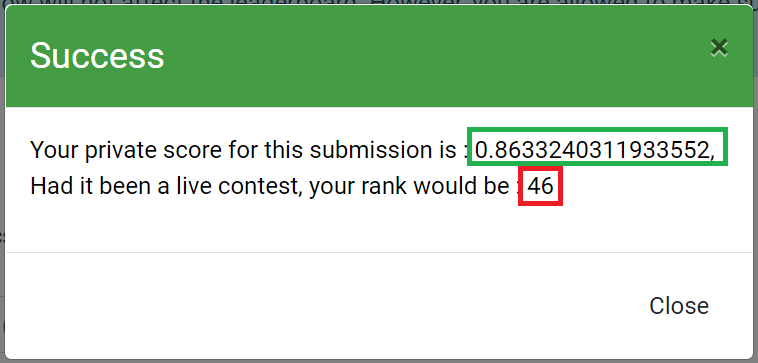

### **<center>😊 Reached Rank 55 in Public LB and 67 in Private LB - Would have reached Rank 46 in Private LB as shown above, if I had made the correct submission of 3 Models Ensemble. Thanks for reading Friends. See you all in Part 2 for more Analysis and Modelling - ENCOURAGE if you liked this Notebook 😊</center>**

### **<center>😊 For Learning Purpose - You can still participate in your free time to see your Public and Private Scores & Rank, though it won't reflect on Leaderboard 😊</center>**

### **<center>😊 Ask your doubts & Share your thoughts, ideas & feedbacks in Comments below 😊</center>**

## References : 

**LightGBM :**

https://lightgbm.readthedocs.io/en/latest/GPU-Tutorial.html

https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm

**CatBoost :**

https://www.kaggle.com/baomengjiao/5kflod-catboost-using-gpu/comments#1015590

**XGBoost :**

https://www.kaggle.com/xhlulu/ieee-fraud-xgboost-with-gpu-fit-in-40s